<a href="https://colab.research.google.com/github/GlazyevaValentina/Final_Project_GlazyevaVa/blob/main/Project_Glazyeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Назва проекту:
## Розфарбовування чорно-білого зображення за допомогою нейронної мережі.

## Мета

**Показати, як за допомогою нейронної мережі можна колоризувати чорно-білі зображення**

## Опис

Для вирішення поставленої задачі була побудована згорткова нейронна мережа.

В першій частині створено просту версію нейромережі, яка розфарбовує задане зображення. Ця мережа навчається і тренується на одному зображенні. 

В другій частині модель має більше шарів та навчається і тренується на заданому наборі зображень.

В третій частині нейромережа складається з encoder та decoder, між ними  fusion layer. Вхідні дані проходять через encoder і через Inception ResNet v2 (нейромережу навчену на 1,2 млн зображень).

Для релізації використані бібліотеки numpy, os, matplotlib, Tensorflow, keras.

Всі зображення взяті із власної бібліотеки зображень.

## Мотивація

Існує дуже багато ресурсів, де можна  розмалювати зображення онлайн

## Декілька прикладів

https://www.cutout.pro/photo-colorizer-black-and-white

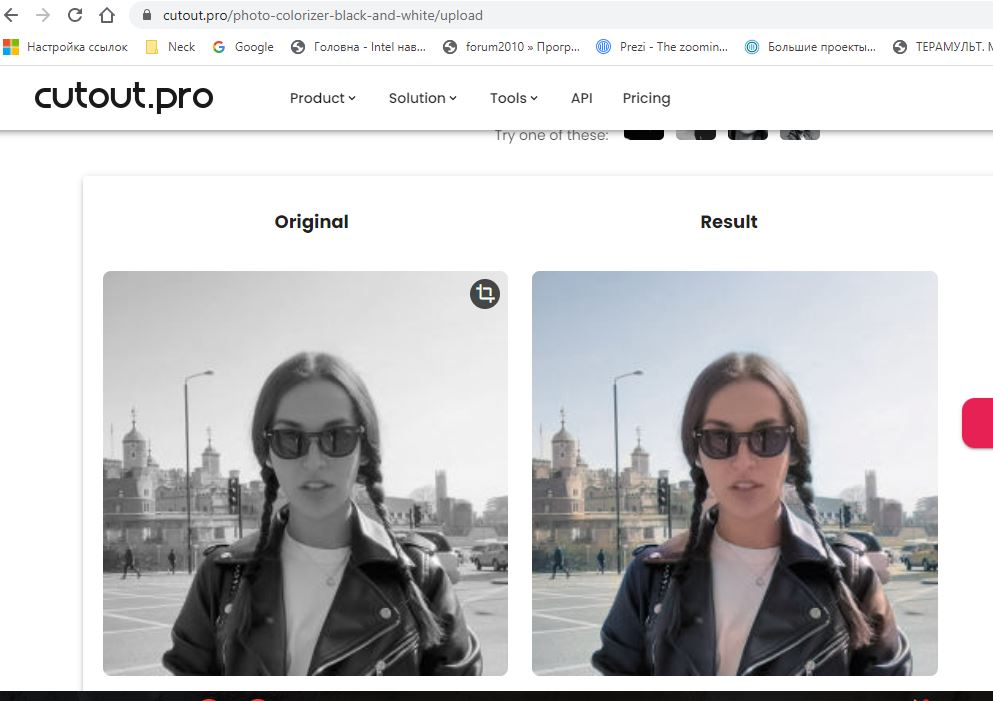

https://vanceai.com/colorize-photo/

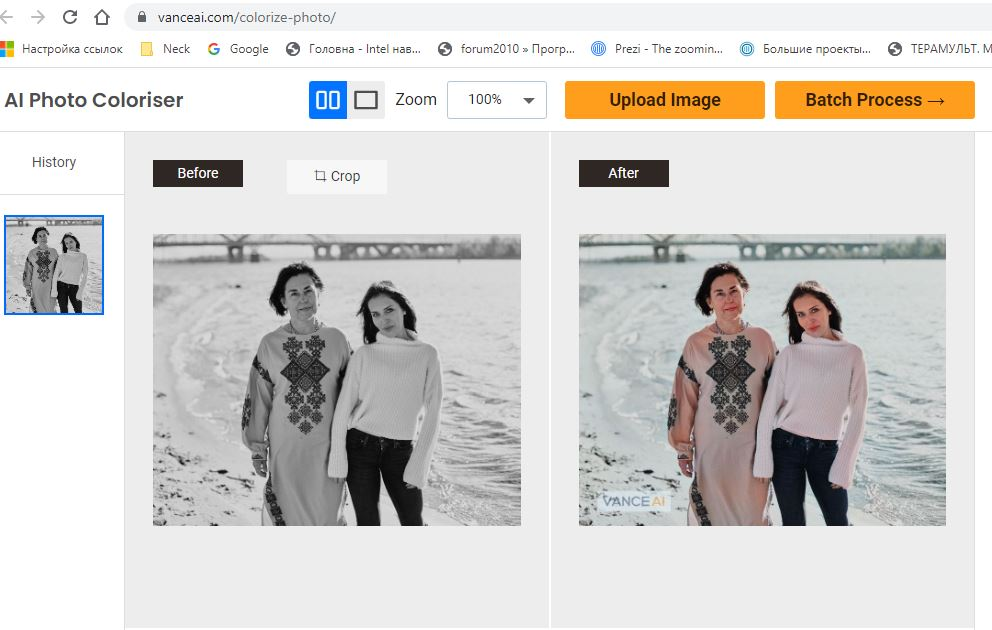

https://www.img2go.com/result#j=bca481b7-78cf-4871-b9c3-d9ee4c36fefc

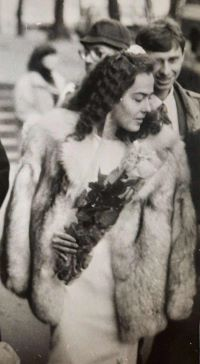

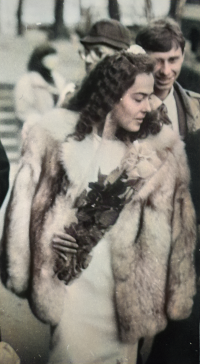

https://palette.fm/

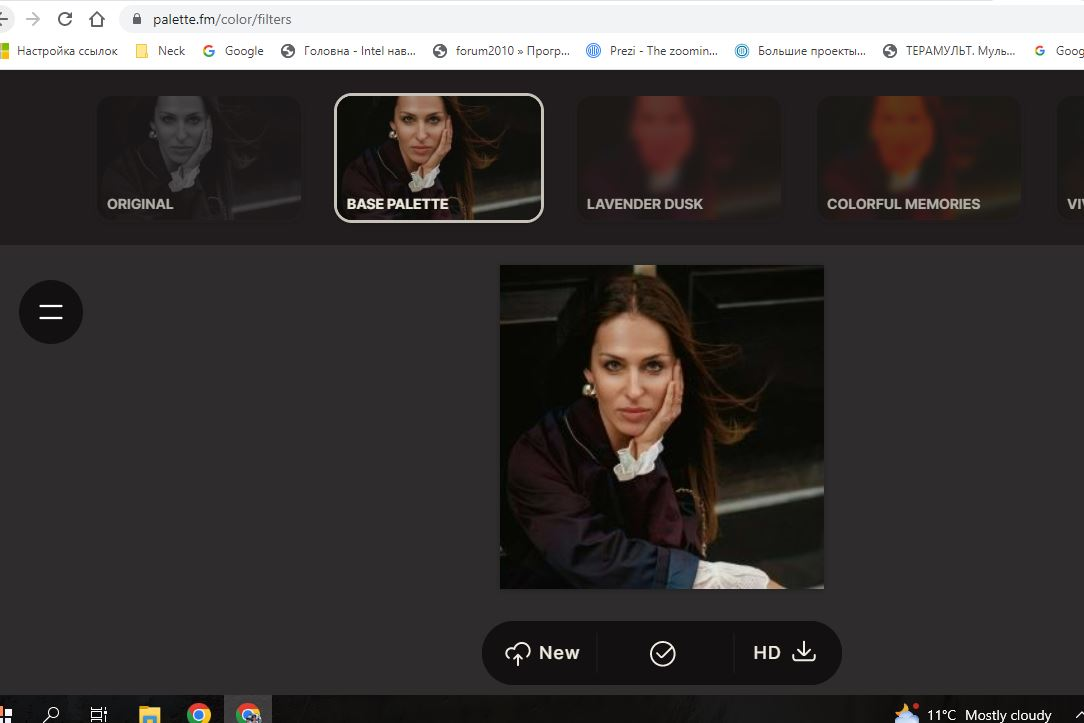

# Можна помітити:
**Зображення, отримані з вказаних сайтів, не дуже відрізняються від тих, які були отримані в результаті виконання цього проекту.**

# ПЕРША ЧАСТИНА
## Модель 1

In [ ]:
import numpy as np
import os
from PIL import Image
import random
import tensorflow as tf
import keras
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten

from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.models import Sequential

from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Get images
image = img_to_array(load_img('/content/gdrive/MyDrive/My Diploma/Luda_Mayak.jpg'))
image = np.array(image, dtype=float)

In [ ]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [ ]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 8)     80        
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 8)     584       
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 16)    1168      
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 16)    2320      
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, None, None, 32)   0

In [ ]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 13s 13s/step - loss: 0.6644
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.8288
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.5107
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3072
Epoch 5/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0461
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0199
Epoch 7/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0446
Epoch 8/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0091
Epoch 9/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0080
Epoch 10/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0077
Epoch 11/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0074
Epoch 12/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0072
Epoch 13/1000
1/1 [==================

In [ ]:
# Output colorizations
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("/content/gdrive/MyDrive/My Diploma/img_result.png", lab2rgb(cur))
imsave("/content/gdrive/MyDrive/My Diploma/img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 265ms/step - loss: 0.0016
0.0016456928569823503
1/1 [==============================] - 0s 140ms/step


(-0.5, 399.5, 399.5, -0.5)

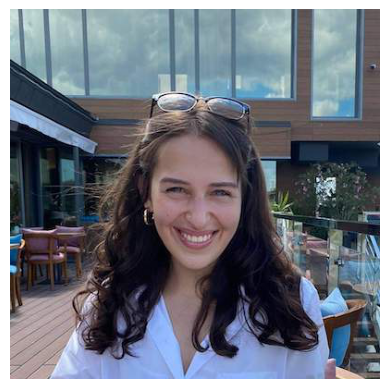

In [ ]:
image_r = Image.open("/content/gdrive/MyDrive/My Diploma/Luda_Mayak.jpg")
plt.imshow(image_r)
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

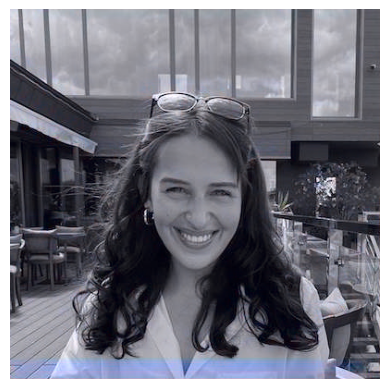

In [ ]:
image_g = Image.open("/content/gdrive/MyDrive/My Diploma/img_result_100_epoch.png")
plt.imshow(image_g)
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

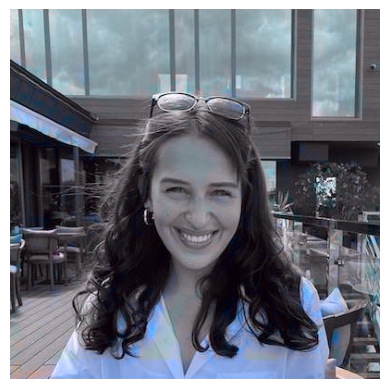

In [ ]:
image_g = Image.open("/content/gdrive/MyDrive/My Diploma/img_result_500_epoch.png")
plt.imshow(image_g)
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

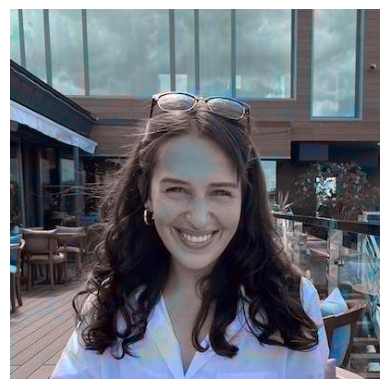

In [ ]:
image_g = Image.open("/content/gdrive/MyDrive/My Diploma/img_result.png")
plt.imshow(image_g)
plt.axis('off')

# ДРУГА ЧАСТИНА 
## МОДЕЛЬ 2

In [ ]:
import numpy as np
import os
import random
import tensorflow as tf
import keras

from PIL import Image
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Get images
X = []
img_width, img_height = 256, 256  # Define the target image width and height

for filename in os.listdir('/content/gdrive/MyDrive/My Diploma/Train/'):
    img = load_img('/content/gdrive/MyDrive/My Diploma/Train/' + filename, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    X.append(img_array)

X = np.array(X, dtype=float)

# Set up train and test data
split = int(0.95*len(X))
Xtrain = X[:split]
Xtrain = 1.0/255*Xtrain


In [ ]:
#Design the neural network
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      640       
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 512)      

In [ ]:
# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

# Generate training data
batch_size = 10
def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

# Train model      
tensorboard = TensorBoard(log_dir="output2/first_run")
model.fit_generator(image_a_b_gen(batch_size), callbacks=[tensorboard], epochs=1, steps_per_epoch=1000)

1000/1000 [==============================] - 301s 301ms/step - loss: 0.0049


In [ ]:
# Save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [ ]:
# Test images
Xtest = rgb2lab(1.0/255*X[split:])[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X[split:])[:,:,:,1:]
Ytest = Ytest / 128
print(model.evaluate(Xtest, Ytest, batch_size=batch_size))

1/1 [==============================] - 1s 833ms/step - loss: 0.0150
0.014995521865785122


In [ ]:
color_me = []
for filename in os.listdir('/content/gdrive/MyDrive/My Diploma/Test/'):
    color_me.append(img_to_array(load_img('/content/gdrive/MyDrive/My Diploma/Test/'+filename)))
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

# Test model
output = model.predict(color_me)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    imsave('/content/gdrive/MyDrive/My Diploma/result/img_'+str(i)+'.png', lab2rgb(cur))

1/1 [==============================] - 1s 1s/step


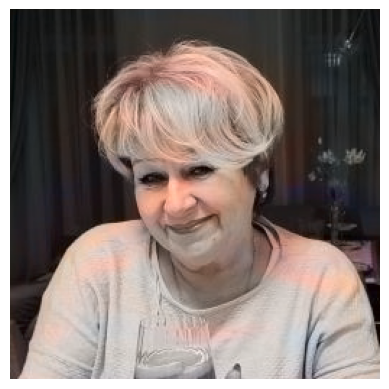

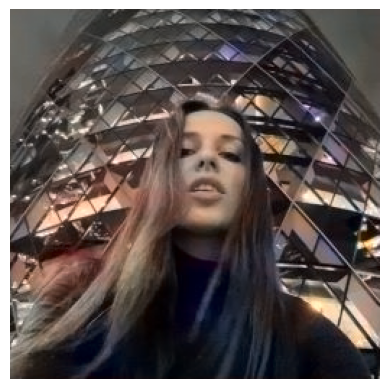

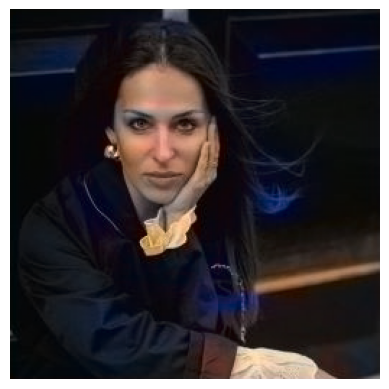

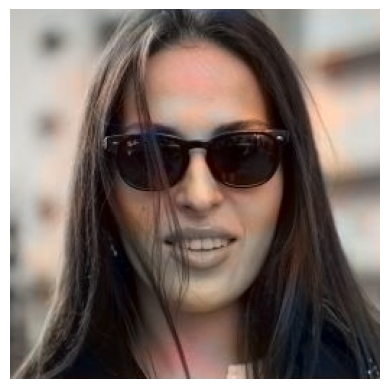

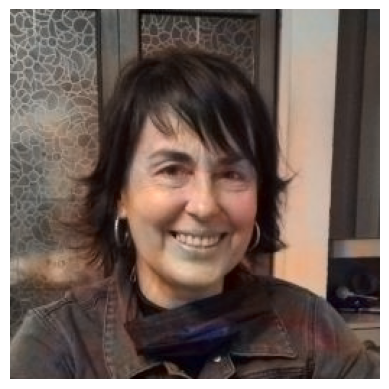

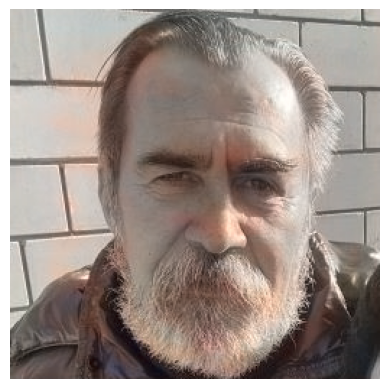

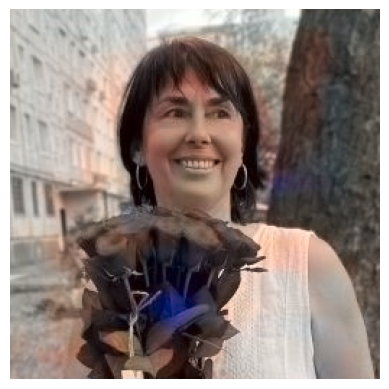

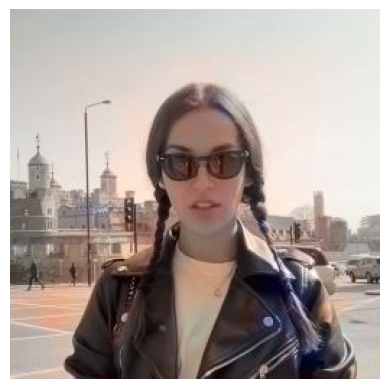

In [ ]:
import matplotlib.pyplot as plt
import os

path = "/content/gdrive/MyDrive/My Diploma/result"
images = os.listdir(path)

for image in images:
    img_path = os.path.join(path, image)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# ТРЕТЯ ЧАСТИНА
## МОДЕЛЬ 3

In [ ]:
import keras

from keras import models
from keras import layers
from keras import optimizers

from tensorflow import keras
from tensorflow.keras import layers

from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image

#from keras.engine import Layer
from keras.layers import Layer

from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

#from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose 
# from keras.layers import merge
from tensorflow.keras.layers import Input, Embedding, concatenate, Reshape

from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.callbacks import TensorBoard 
# from keras.models import Sequential, Model

from tensorflow.keras.models import Sequential, Model

from keras.layers.core import RepeatVector, Permute
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [ ]:
print(keras.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Get images

X = []

for filename in os.listdir('/content/gdrive/MyDrive/My Diploma_/Third version/Train/'):
    X.append(img_to_array(load_img('/content/gdrive/MyDrive/My Diploma_/Third version/Train/'+filename)))
X = np.array(X, dtype=float)

# Set up train and test data
split = int(0.95*len(X))
Xtrain = X[:split]
Xtrain = 1.0/255*Xtrain
                                   
#Load weights
inception = InceptionResNetV2(weights='imagenet', include_top=True)
# inception.graph = tf.get_default_graph()  


inception.graph = tf.compat.v1.get_default_graph()
                                

Instructions for updating:
Colocations handled automatically by placer.


225209952/225209952 [==============================] - 2s 0us/step


In [ ]:
embed_input = Input(shape=(1000,))

In [ ]:
#Encoder
encoder_input = Input(shape=(256, 256, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

#Fusion
fusion_output = RepeatVector(32 * 32)(embed_input) 
fusion_output = Reshape(([32, 32, 1000]))(fusion_output)
fusion_output = concatenate([encoder_output, fusion_output], axis=3) 
fusion_output = Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_output) 

#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)

model = Model(inputs=[encoder_input, embed_input], outputs=decoder_output)

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_233 (Conv2D)            (None, 128, 128, 64  640         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_234 (Conv2D)            (None, 128, 128, 12  73856       ['conv2d_233[0][0]']             
                                8)                                                            

In [ ]:
def create_inception_embedding(grayscaled_rgb):
    grayscaled_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (299, 299, 3), mode='constant')
        grayscaled_rgb_resized.append(i)
    grayscaled_rgb_resized = np.array(grayscaled_rgb_resized)
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)
    with inception.graph.as_default():
        # embed = inception.predict(grayscaled_rgb_resized)
        embed = inception.__call__(grayscaled_rgb_resized)
    return embed

In [ ]:
# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

In [ ]:
#Generate training data
batch_size = 10

def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        grayscaled_rgb = gray2rgb(rgb2gray(batch))
        embed = create_inception_embedding(grayscaled_rgb)
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        X_batch = X_batch.reshape(X_batch.shape+(1,))
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield ([X_batch, create_inception_embedding(grayscaled_rgb)], Y_batch)


In [ ]:
# Train model
tensorboard = TensorBoard(log_dir='/content/gdrive/MyDrive/My Diploma_/Third version/output')

model.compile(optimizer='adam', loss='mse')
model.fit(image_a_b_gen(batch_size), callbacks=[tensorboard], epochs=4, steps_per_epoch=2)

Epoch 1/4
2/2 [==============================] - 67s 25s/step - batch: 0.5000 - size: 9.0000 - loss: 0.5021
Epoch 2/4
2/2 [==============================] - 58s 31s/step - batch: 0.5000 - size: 9.0000 - loss: 0.6078
Epoch 3/4
2/2 [==============================] - 71s 36s/step - batch: 0.5000 - size: 9.0000 - loss: 0.0135
Epoch 4/4
2/2 [==============================] - 79s 41s/step - batch: 0.5000 - size: 9.0000 - loss: 0.0074


In [ ]:
#Make a prediction on the unseen images
color_me = []
for filename in os.listdir('/content/gdrive/MyDrive/My Diploma_/Third version/Test/'):
    color_me.append(img_to_array(load_img('/content/gdrive/MyDrive/My Diploma_/Third version/Test/'+filename)))
color_me = np.array(color_me, dtype=float)
gray_me = gray2rgb(rgb2gray(1.0/255*color_me))
color_me_embed = create_inception_embedding(gray_me)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

In [ ]:
# Test model
# output = model.predict([color_me, color_me_embed])
output = model.predict([color_me, color_me_embed], steps=len(color_me))
output = output * 128

# Output colorizations
for i in range(len(color_me)):
  cur = np.zeros((256, 256, 3))
  cur[:,:,0] = color_me[i][:,:,0]
  cur[:,:,1:] = output[i]
  imsave("/content/gdrive/MyDrive/My Diploma_/Third version/result/img_"+str(i)+".png", lab2rgb(cur))


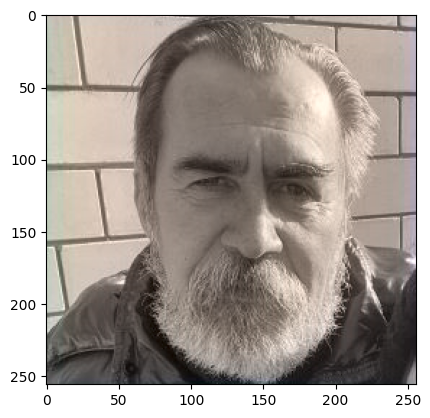

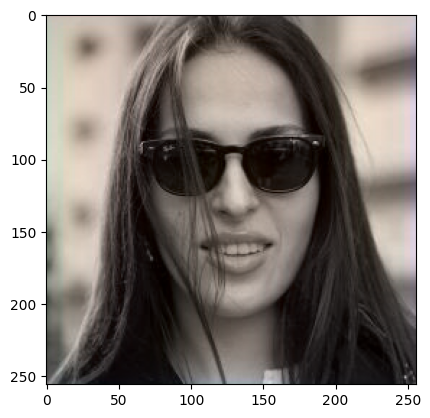

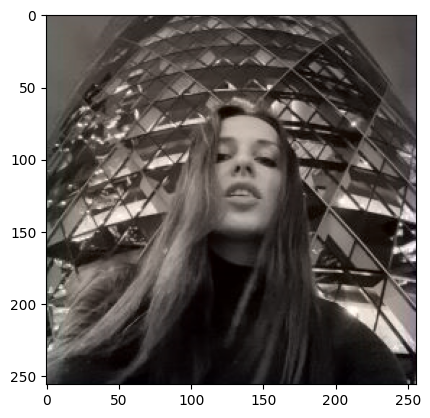

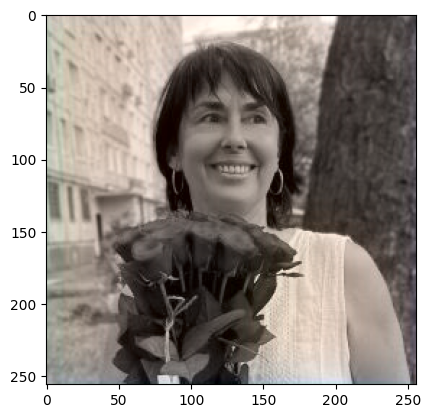

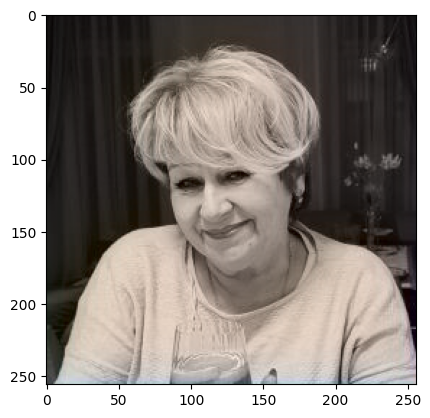

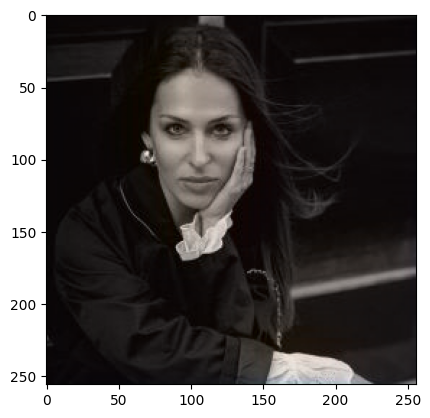

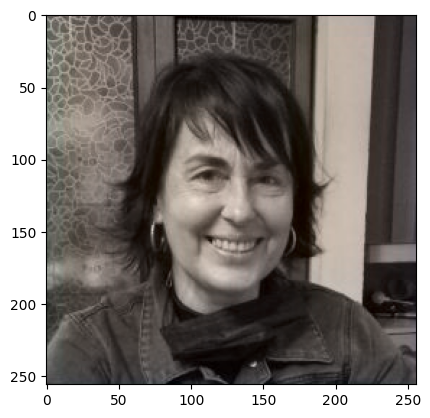

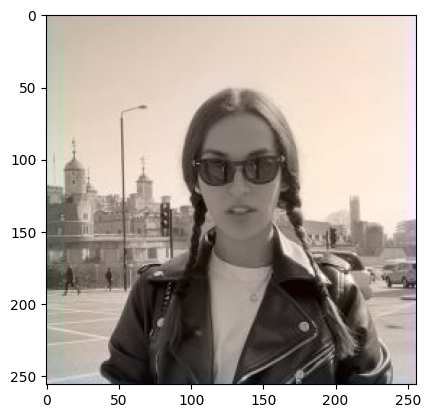

In [ ]:
import matplotlib.pyplot as plt
import os

path = "/content/gdrive/MyDrive/My Diploma_/Third version/result"
images = os.listdir(path)

for image in images:
    img_path = os.path.join(path, image)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.show()

# Висновок

**Розфарбовування чорно-білих зображень - дуже цікава задача, при розв'язанні якої треба займатися наукою і творчістю. Ще тут потрібно багато експериментувати.
Наприклад, можна було б використати інший датасет або більше зображень, щоб підвищити точність роботи нейромережі.
Це все ще чекає попереду**

